In [67]:
import numpy as np
import pandas as pd

def load_csv(fname):
    df = pd.read_csv(fname)
    df["time"] =  pd.to_datetime(df['time'], errors='coerce', unit='ms')
    return df

imu_df = load_csv("/Volumes/data/IMU7187.csv")
print (f"Loaded {len(imu_df)} samples over {(imu_df['time'].iloc[-1] - imu_df['time'].iloc[0]).total_seconds()}s!")

Loaded 302080 samples over 3196.629s!


Sample rate: 100.000hz


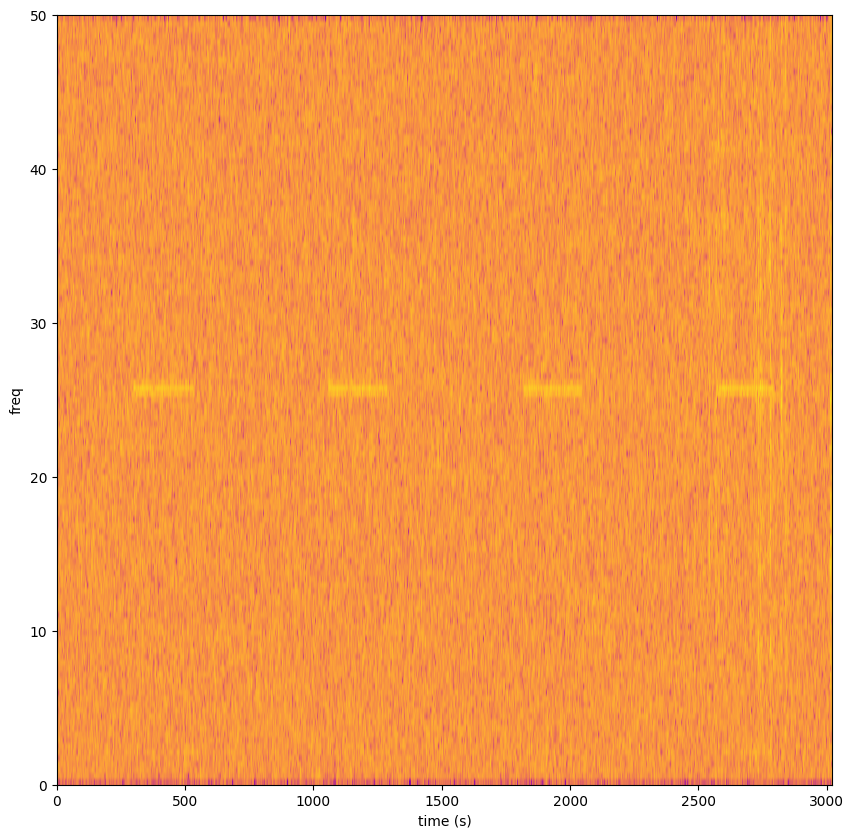

In [83]:
import matplotlib.pyplot as plt

dt = imu_df['time'].diff().median().total_seconds()
sample_rate = 1.0 / dt
print(f"Sample rate: {sample_rate:.3f}hz")

plt.figure(figsize=(10, 10))
plt.specgram(np.sqrt(imu_df['mag2']), Fs=sample_rate, NFFT=256, noverlap=0, detrend="mean", cmap="plasma")
plt.xlabel("time (s)")
plt.ylabel("freq")
plt.show()